In [1]:
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.


In [2]:
df = pd.read_csv("car data.csv")

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

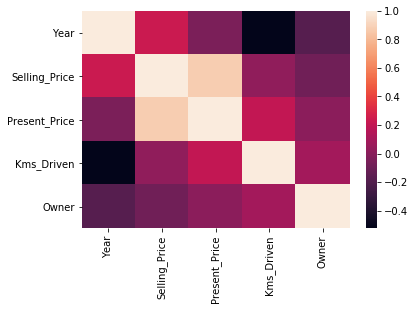

In [7]:
sns.heatmap(df.corr())

In [8]:
from sklearn.preprocessing import LabelEncoder
label_e = LabelEncoder()

In [9]:
df["Fuel_Type"] = label_e.fit_transform(df["Fuel_Type"])

In [10]:
x = df.iloc[:,[1,3,4,5,7]]
y = df.iloc[:,2].values

In [11]:
x["Transmission"] = x["Transmission"].replace(to_replace='Manual',value=0)
x["Transmission"] = x["Transmission"].replace(to_replace='Automatic',value=1)

C:\Users\danis\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\danis\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder

In [13]:
x

,Year,Present_Price,Kms_Driven,Fuel_Type,Transmission
0,2014,5.59,27000,2,0
1,2013,9.54,43000,1,0
2,2017,9.85,6900,2,0
3,2011,4.15,5200,2,0
4,2014,6.87,42450,1,0
...,...,...,...,...,...
296,2016,11.60,33988,1,0
297,2015,5.90,60000,2,0
298,2009,11.00,87934,2,0
299,2017,12.50,9000,1,0


In [14]:
sc = MinMaxScaler()
ohe = OneHotEncoder(categories='auto',sparse=False,handle_unknown="ignore")
x = sc.fit_transform(x)
x = ohe.fit_transform(x)

In [15]:
print(x.shape)

(301, 374)


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [18]:
from keras.models import Sequential
from keras.layers import Dense

In [19]:
def model():
    ai = Sequential()

    ai.add(Dense(128,activation='relu',input_shape=(374,)))
    ai.add(Dense(64,activation='relu'))
    ai.add(Dense(32,activation='relu'))
    ai.add(Dense(16,activation='relu'))
    ai.add(Dense(1,activation='linear'))

    ai.compile(optimizer="Adam",loss='mse',metrics=['mae','mse'])
    
    return ai

In [20]:
from keras.wrappers.scikit_learn import KerasRegressor

In [21]:
ai = KerasRegressor(build_fn=model,epochs=300,batch_size=15)

In [22]:
history = ai.fit(x_train,y_train)

Epoch 1/300
240/240 [==============================] - 0s 511us/step - loss: 44.8245 - mae: 4.5472 - mse: 44.8245
Epoch 2/300
240/240 [==============================] - 0s 91us/step - loss: 39.6645 - mae: 4.0803 - mse: 39.6645
Epoch 3/300
240/240 [==============================] - 0s 87us/step - loss: 29.1039 - mae: 3.4167 - mse: 29.1039
Epoch 4/300
240/240 [==============================] - 0s 96us/step - loss: 21.8830 - mae: 3.1162 - mse: 21.8830
Epoch 5/300
240/240 [==============================] - 0s 96us/step - loss: 16.5464 - mae: 2.5773 - mse: 16.5464
Epoch 6/300
240/240 [==============================] - 0s 104us/step - loss: 12.1083 - mae: 2.2040 - mse: 12.1083
Epoch 7/300
240/240 [==============================] - 0s 87us/step - loss: 8.6500 - mae: 1.8776 - mse: 8.6500
Epoch 8/300
240/240 [==============================] - 0s 104us/step - loss: 6.6434 - mae: 1.5799 - mse: 6.6434
Epoch 9/300
240/240 [==============================] - 0s 79us/step - loss: 4.7616 - mae: 1.2188 

240/240 [==============================] - 0s 79us/step - loss: 0.0124 - mae: 0.0758 - mse: 0.0124
Epoch 75/300
240/240 [==============================] - 0s 75us/step - loss: 0.0099 - mae: 0.0713 - mse: 0.0099
Epoch 76/300
240/240 [==============================] - 0s 75us/step - loss: 0.0098 - mae: 0.0658 - mse: 0.0098
Epoch 77/300
240/240 [==============================] - 0s 75us/step - loss: 0.0087 - mae: 0.0627 - mse: 0.0087
Epoch 78/300
240/240 [==============================] - 0s 71us/step - loss: 0.0099 - mae: 0.0667 - mse: 0.0099
Epoch 79/300
240/240 [==============================] - 0s 71us/step - loss: 0.0078 - mae: 0.0581 - mse: 0.0078
Epoch 80/300
240/240 [==============================] - 0s 66us/step - loss: 0.0057 - mae: 0.0506 - mse: 0.0057
Epoch 81/300
240/240 [==============================] - 0s 67us/step - loss: 0.0050 - mae: 0.0483 - mse: 0.0050
Epoch 82/300
240/240 [==============================] - 0s 71us/step - loss: 0.0053 - mae: 0.0508 - mse: 0.0053
Epoch

240/240 [==============================] - 0s 75us/step - loss: 0.0432 - mae: 0.1321 - mse: 0.0432
Epoch 147/300
240/240 [==============================] - 0s 71us/step - loss: 0.0270 - mae: 0.1132 - mse: 0.0270
Epoch 148/300
240/240 [==============================] - 0s 75us/step - loss: 0.0249 - mae: 0.1120 - mse: 0.0249
Epoch 149/300
240/240 [==============================] - 0s 71us/step - loss: 0.0136 - mae: 0.0784 - mse: 0.0136
Epoch 150/300
240/240 [==============================] - 0s 71us/step - loss: 0.0121 - mae: 0.0722 - mse: 0.0121
Epoch 151/300
240/240 [==============================] - 0s 71us/step - loss: 0.0057 - mae: 0.0478 - mse: 0.0057
Epoch 152/300
240/240 [==============================] - 0s 66us/step - loss: 0.0035 - mae: 0.0383 - mse: 0.0035
Epoch 153/300
240/240 [==============================] - 0s 66us/step - loss: 0.0021 - mae: 0.0321 - mse: 0.0021
Epoch 154/300
240/240 [==============================] - 0s 71us/step - loss: 0.0019 - mae: 0.0285 - mse: 0.00

240/240 [==============================] - 0s 71us/step - loss: 0.0083 - mae: 0.0596 - mse: 0.0083
Epoch 217/300
240/240 [==============================] - 0s 71us/step - loss: 0.0064 - mae: 0.0521 - mse: 0.0064
Epoch 218/300
240/240 [==============================] - 0s 66us/step - loss: 0.0057 - mae: 0.0508 - mse: 0.0057
Epoch 219/300
240/240 [==============================] - 0s 71us/step - loss: 0.0059 - mae: 0.0539 - mse: 0.0059
Epoch 220/300
240/240 [==============================] - 0s 66us/step - loss: 0.0059 - mae: 0.0529 - mse: 0.0059
Epoch 221/300
240/240 [==============================] - 0s 67us/step - loss: 0.0073 - mae: 0.0562 - mse: 0.0073
Epoch 222/300
240/240 [==============================] - 0s 71us/step - loss: 0.0055 - mae: 0.0496 - mse: 0.0055
Epoch 223/300
240/240 [==============================] - 0s 75us/step - loss: 0.0065 - mae: 0.0521 - mse: 0.0065
Epoch 224/300
240/240 [==============================] - 0s 71us/step - loss: 0.0069 - mae: 0.0574 - mse: 0.00

240/240 [==============================] - 0s 71us/step - loss: 0.1267 - mae: 0.2379 - mse: 0.1267
Epoch 289/300
240/240 [==============================] - 0s 75us/step - loss: 0.1246 - mae: 0.2319 - mse: 0.1246
Epoch 290/300
240/240 [==============================] - 0s 75us/step - loss: 0.0569 - mae: 0.1628 - mse: 0.0569
Epoch 291/300
240/240 [==============================] - 0s 75us/step - loss: 0.0408 - mae: 0.1332 - mse: 0.0408
Epoch 292/300
240/240 [==============================] - 0s 75us/step - loss: 0.0300 - mae: 0.1183 - mse: 0.0300
Epoch 293/300
240/240 [==============================] - 0s 71us/step - loss: 0.0151 - mae: 0.0839 - mse: 0.0151
Epoch 294/300
240/240 [==============================] - 0s 71us/step - loss: 0.0155 - mae: 0.0826 - mse: 0.0155
Epoch 295/300
240/240 [==============================] - 0s 71us/step - loss: 0.0119 - mae: 0.0693 - mse: 0.0119
Epoch 296/300
240/240 [==============================] - 0s 66us/step - loss: 0.0067 - mae: 0.0541 - mse: 0.00

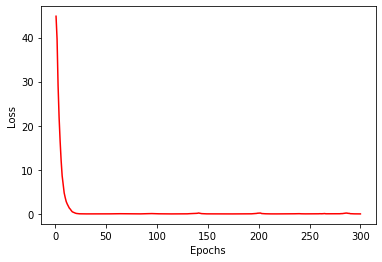

In [23]:
epoch_count = range(1,len(history.history["loss"])+1)

plt.plot(epoch_count,history.history["loss"],'r-')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

## Prediction Using User Input Data :-

In [24]:
year = float(input("Model(year) >"))
present_price = float(input("Present Price of the car (in Lakhs Rs) >"))
kms_driven = float(input("KMs Driver >"))
fuel = float(input("Fuel Type of Car ('2'- Petrol,'1'- Diesel,'0'-CNG)>"))
transmission = float(input("Type of transmission '0' for manual and '1' for automatic >"))

Model(year) >2009
Present Price of the car (in Lakhs Rs) >509000
KMs Driver >15000
Fuel Type of Car ('2'- Petrol,'1'- Diesel,'0'-CNG)>2
Type of transmission '0' for manual and '1' for automatic >0


In [26]:
x_pred = np.array([year,present_price,kms_driven,fuel,transmission]).reshape(1,-1)
x_pred = ohe.transform(x_pred)

y_pred = ai.predict(x_pred)
print('The Expected Reselling price is',*y_pred)


The Expected Reselling price is 3.4540386
